In [1]:
import numpy as np
from collections import Counter

with open("../data/COIL-RAG/COIL-RAG_graph_labels.txt") as f:
    labels = list(map(lambda x: int(x) - 1, f.readlines()))

with open("../data/COIL-RAG/COIL-RAG_graph_indicator.txt") as f:
    indicators = list(map(lambda x: int(x) - 1, f.readlines()))

with open("../data/COIL-RAG/COIL-RAG_A.txt") as f:
    edges = list(map(lambda x: (int(x.split(",")[0]) - 1, int(x.split(",")[1]) - 1), f.readlines()))

with open("../data/COIL-RAG/COIL-RAG_node_attributes.txt") as f:
    node_attrs = list(map(lambda x: np.array(list(map(float, x.split(", ")))), f.readlines()))

with open("../data/COIL-RAG/COIL-RAG_edge_attributes.txt") as f:
    edge_attrs = list(map(float, f.readlines()))

In [2]:
import networkx as nx
import numpy as np

def plot_graph(G, **kwargs):
    options = {
        "node_size": 50,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1,
        "width": 2,
    }
    options.update(kwargs)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, **options, nodelist=G.nodes)

In [3]:
graphs = [nx.Graph() for i in range(len(labels))]

for i, (feat, g) in enumerate(zip(node_attrs, indicators)):
    graphs[g].add_node(i, hist=feat)

for i, (length, (n1, n2)) in enumerate(zip(edge_attrs, edges)):
    g1, g2 = indicators[n1], indicators[n2]
    assert g1 == g2

    graphs[g1].add_edge(n1, n2, length=length)

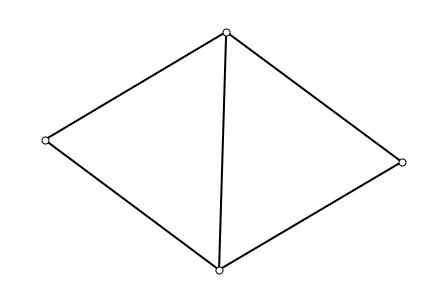

In [12]:
plot_graph(graphs[11])

In [5]:
from sklearn.model_selection import train_test_split

g_train, g_test, y_train, y_test = train_test_split(graphs, labels, test_size=500, random_state=42, stratify=labels)

In [9]:
graphs[10].get_edge_data(28, 29)

{'length': 520.0}

In [11]:
graphs[11].nodes

NodeView((30, 31, 32, 33))

In [19]:
import torch

feats = torch.vstack([torch.tensor(graphs[11].nodes[i]["hist"]) for i in graphs[11].nodes])

In [20]:
feats.size()

torch.Size([4, 64])